1 - Importing Libraries
2 - Reading Dataset
3 - Checking Datatypes
4 - Checking & treating Outliers and then missing values
5 - Data preparation
6 - EDA
7 - Feature Engineering
8 - Feature Selection
9 - Feature Scaling
10 - Dummy Coding
11 - Splitting Dataset
12 - Models using Grid Search CV
13 - Prediction
14 - Checking Accuracy or evaluating results

1.importing libraries
2.loading dataset
3.shape,info,dtypes,describe(object,int64,float)
4.isnull,isin,nunique
5.delete redundant features and unique features
6.seperate numerical and categorical for visualisation
    numerical--- pairplot,hist
    categorical-- countplot(cat vs its count),boxplot(cat vs num(target))
    num Vs num---scatterplot
7.target variable-- hist
    if it is not normally dit--transform(log/square)
8.outliers(target)
    boxplot(apply boolean exp to filter the datas)
    or we can use IQR (upper bound value and lower bound value)
9.missing values:
        --heatmap to visualise the null values
    --form dataframe with total,percentage,dtypes
    --use fillna(ffill,bfill),replace
    i)numerical-- median 
    ii)categorical--mode
    after handled null values visualise null values
10.correlation
    --visualisation(heatmap)(>0.5,<-0.5)
11.normality test
    --parametric(shapiro,jarquebera)
    --non parametric(wilcoxan)
12.seperate numerical and categorical features
    num --hist--not normally dist--take log/square transformation--normalisation(already normally-standardisation)
    cat--dummy,pandas(nominal),one hot encoder,sklearn(nominal)/label encoding(ordinal)
13.new_dataset=concat(num,cat)
14.splitting target and independent
15.call model
16.evaluate metrics,compare the pred and act
17.export the file and graphs

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
pd.set_option('max_rows',30000)
pd.set_option('max_columns',40)

In [7]:
log=pd.read_csv('h1n1_vaccine_prediction.csv')
log.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [9]:
log.nunique()

unique_id                    26707
h1n1_worry                       4
h1n1_awareness                   3
antiviral_medication             2
contact_avoidance                2
bought_face_mask                 2
wash_hands_frequently            2
avoid_large_gatherings           2
reduced_outside_home_cont        2
avoid_touch_face                 2
dr_recc_h1n1_vacc                2
dr_recc_seasonal_vacc            2
chronic_medic_condition          2
cont_child_undr_6_mnths          2
is_health_worker                 2
has_health_insur                 2
is_h1n1_vacc_effective           5
is_h1n1_risky                    5
sick_from_h1n1_vacc              5
is_seas_vacc_effective           5
is_seas_risky                    5
sick_from_seas_vacc              5
age_bracket                      5
qualification                    4
race                             4
sex                              2
income_level                     3
marital_status                   2
housing_status      

In [10]:
log.shape

(26707, 34)

In [11]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [12]:
log.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [13]:
plt.rcParams['figure.figsize']=(15,6)


In [14]:
log.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [15]:
log.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [16]:
predictor=log.drop('h1n1_vaccine',axis=1)
target=log['h1n1_vaccine']

In [17]:
plt.rcParams['figure.figsize']=(10,5)

In [18]:
predictor=predictor.astype('str')
predictor.dtypes

unique_id                    object
h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
dr_recc_h1n1_vacc            object
dr_recc_seasonal_vacc        object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
has_health_insur             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status              

In [19]:
predictor.drop('unique_id',axis=1,inplace=True)

In [20]:
predictor.describe(include='object').transpose()

,count,unique,top,freq
h1n1_worry,26707,5,2.0,10575
h1n1_awareness,26707,4,1.0,14598
antiviral_medication,26707,3,0.0,25335
contact_avoidance,26707,3,1.0,19228
bought_face_mask,26707,3,0.0,24847
wash_hands_frequently,26707,3,1.0,22015
avoid_large_gatherings,26707,3,0.0,17073
reduced_outside_home_cont,26707,3,0.0,17644
avoid_touch_face,26707,3,1.0,18001
dr_recc_h1n1_vacc,26707,3,0.0,19139


In [21]:
predictor.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
dtype: i

In [22]:
comp=pd.concat([predictor.isin(['nan']).sum(),log.isnull().sum()],axis=1,keys=['nan','null'])
comp

,nan,null
h1n1_worry,92.0,92
h1n1_awareness,116.0,116
antiviral_medication,71.0,71
contact_avoidance,208.0,208
bought_face_mask,19.0,19
wash_hands_frequently,42.0,42
avoid_large_gatherings,87.0,87
reduced_outside_home_cont,82.0,82
avoid_touch_face,128.0,128
dr_recc_h1n1_vacc,2160.0,2160


In [23]:
for i in predictor.columns:
    predictor[i]=predictor[i].replace('nan',predictor[i].mode()[0])

<AxesSubplot:>

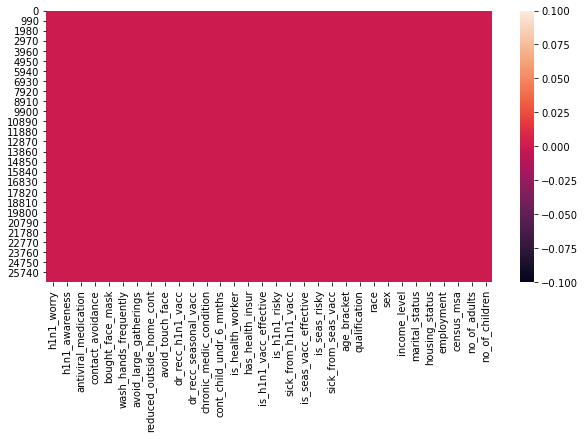

In [24]:
sns.heatmap(predictor.isin(['nan']))

In [25]:
predictor.nunique()

h1n1_worry                   4
h1n1_awareness               3
antiviral_medication         2
contact_avoidance            2
bought_face_mask             2
wash_hands_frequently        2
avoid_large_gatherings       2
reduced_outside_home_cont    2
avoid_touch_face             2
dr_recc_h1n1_vacc            2
dr_recc_seasonal_vacc        2
chronic_medic_condition      2
cont_child_undr_6_mnths      2
is_health_worker             2
has_health_insur             2
is_h1n1_vacc_effective       5
is_h1n1_risky                5
sick_from_h1n1_vacc          5
is_seas_vacc_effective       5
is_seas_risky                5
sick_from_seas_vacc          5
age_bracket                  5
qualification                4
race                         4
sex                          2
income_level                 3
marital_status               2
housing_status               2
employment                   3
census_msa                   3
no_of_adults                 4
no_of_children               4
dtype: i

In [26]:
for i in predictor.columns:
    print(predictor[i].unique())

['1.0' '3.0' '2.0' '0.0']
['0.0' '2.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['1.0' '0.0']
['1.0' '0.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['0.0' '1.0']
['1.0' '0.0']
['3.0' '5.0' '4.0' '2.0' '1.0']
['1.0' '4.0' '3.0' '2.0' '5.0']
['2.0' '4.0' '1.0' '5.0' '3.0']
['2.0' '4.0' '5.0' '3.0' '1.0']
['1.0' '2.0' '4.0' '3.0' '5.0']
['2.0' '4.0' '1.0' '5.0' '3.0']
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
['< 12 Years' '12 Years' 'College Graduate' 'Some College']
['White' 'Black' 'Other or Multiple' 'Hispanic']
['Female' 'Male']
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
['Not Married' 'Married']
['Own' 'Rent']
['Not in Labor Force' 'Employed' 'Unemployed']
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
['0.0' '2.0' '1.0' '3.0']
['0.0' '3.0' '2.0' '1.0']


In [27]:
predict_dummy=pd.get_dummies(predictor,drop_first=True)

In [28]:
predict_dummy.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,dr_recc_h1n1_vacc_1.0,dr_recc_seasonal_vacc_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,has_health_insur_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,...,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,...,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
target=log['h1n1_vaccine']
target.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

C:\Users\spkpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

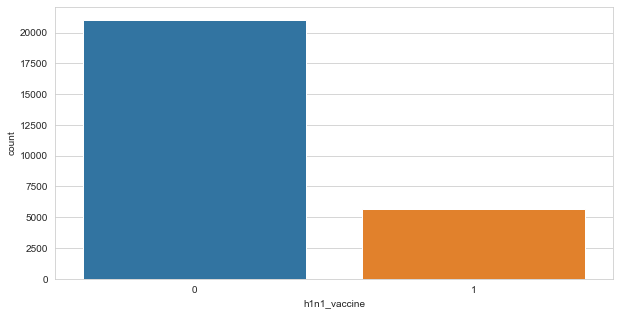

In [30]:
sns.set_style('whitegrid')
sns.countplot(target)

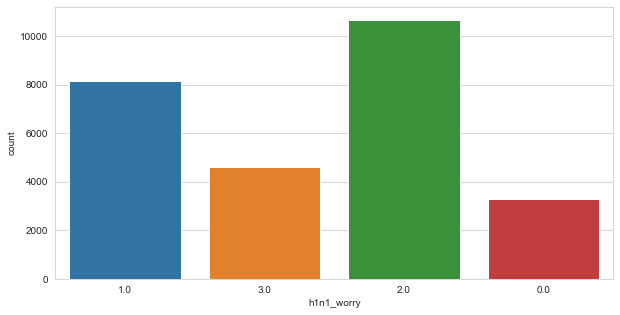

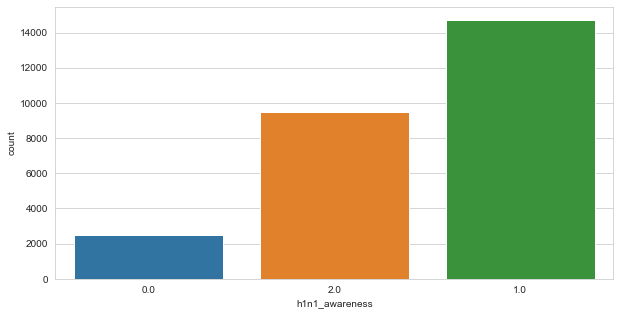

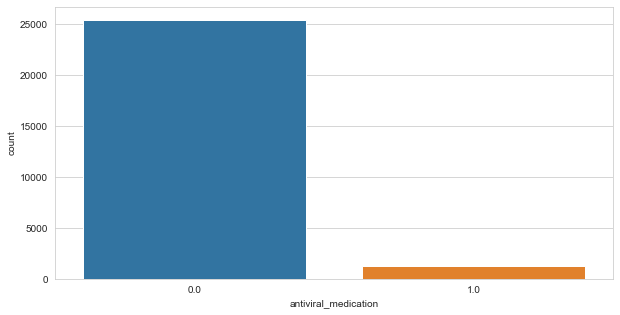

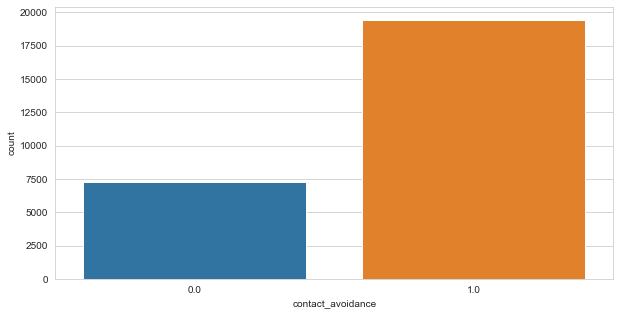

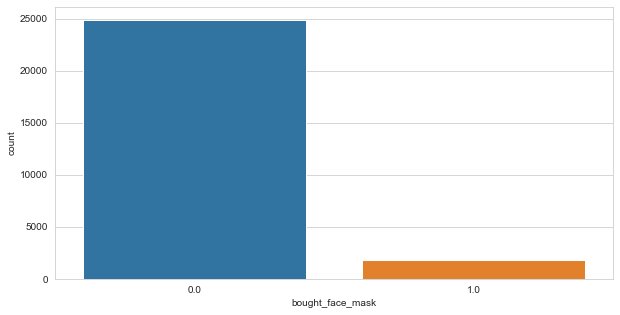

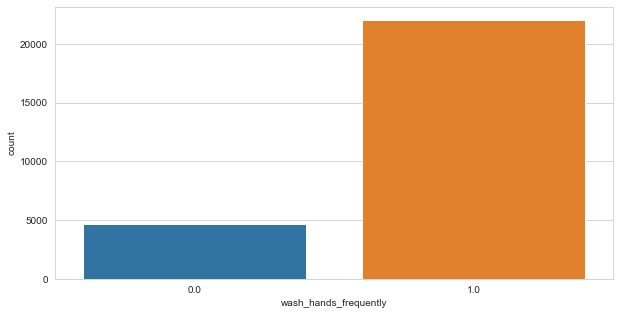

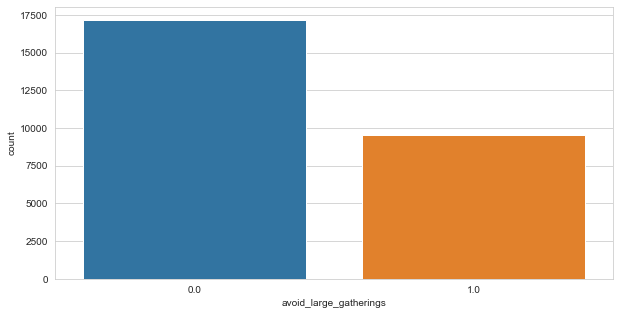

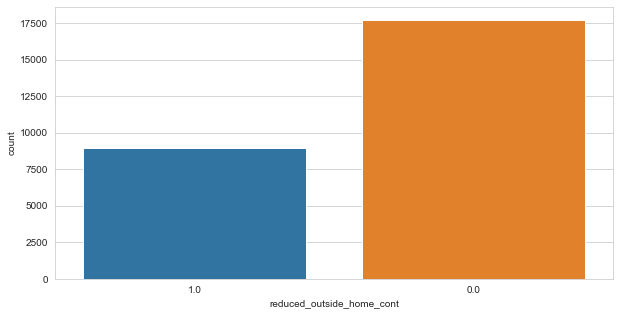

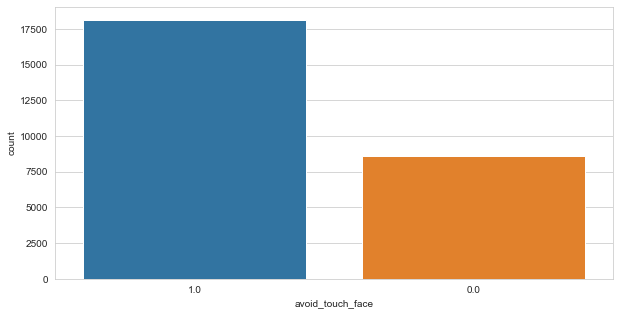

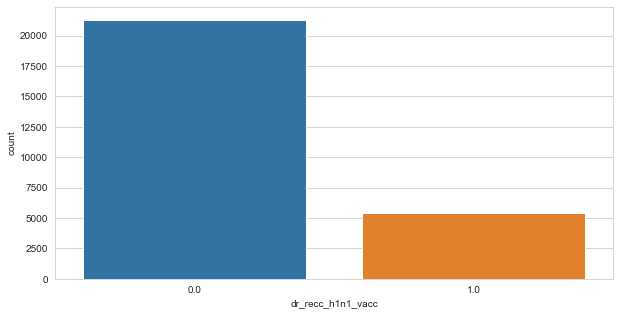

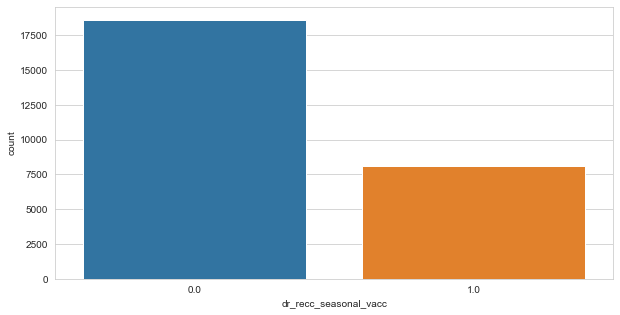

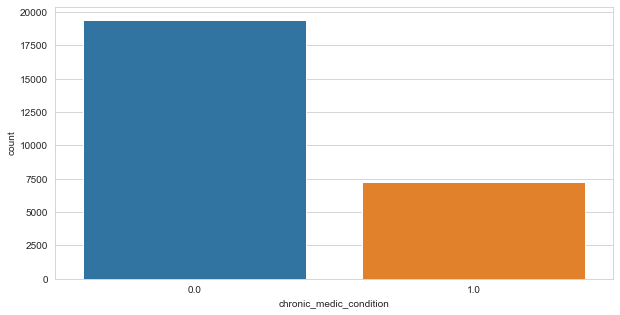

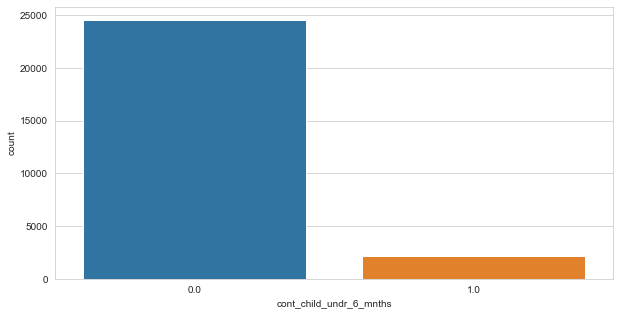

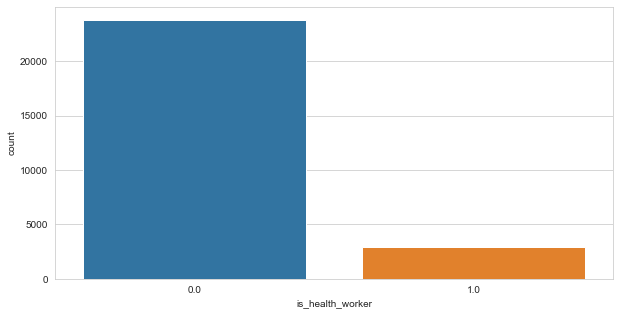

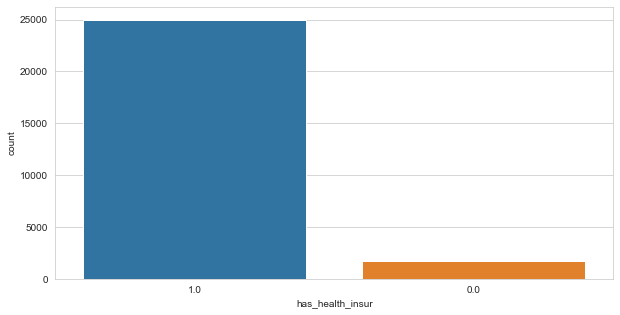

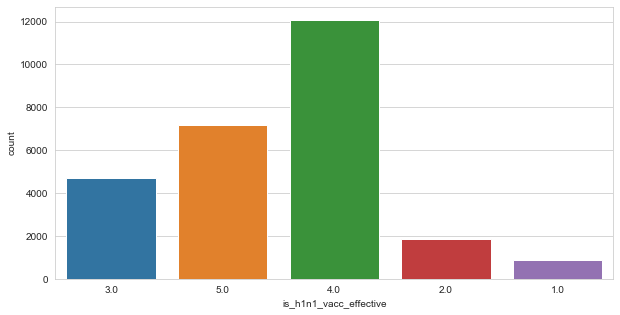

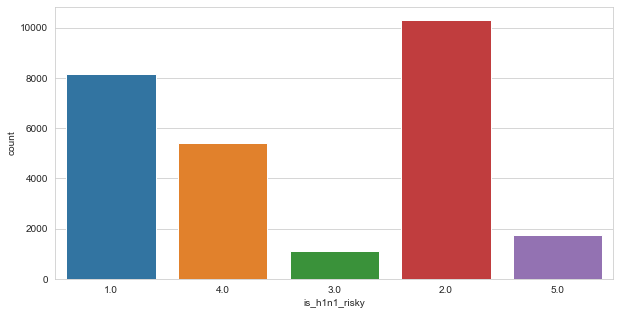

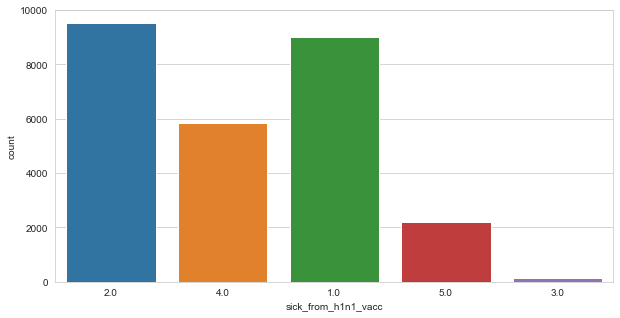

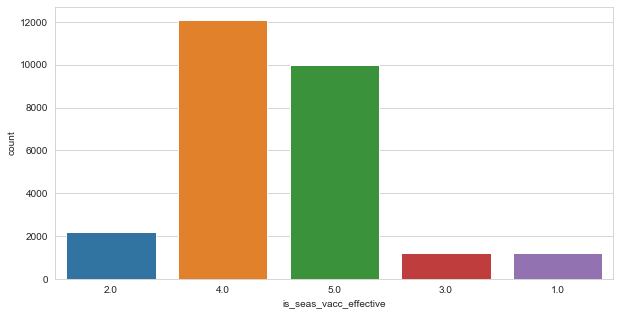

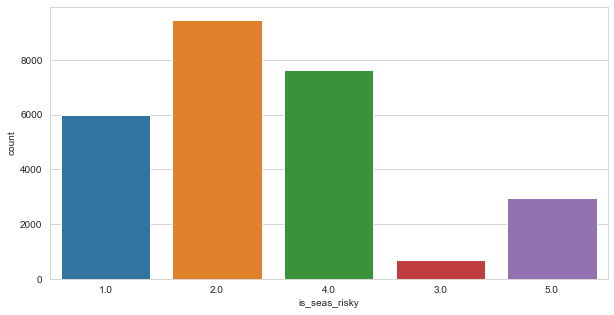

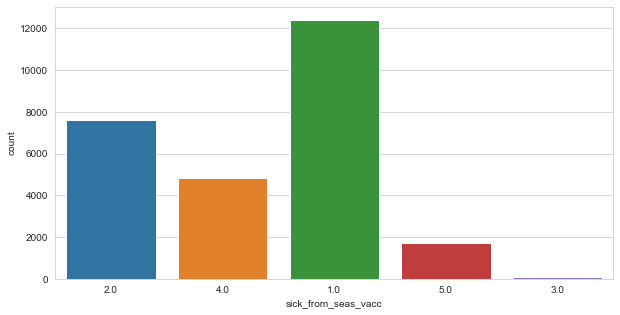

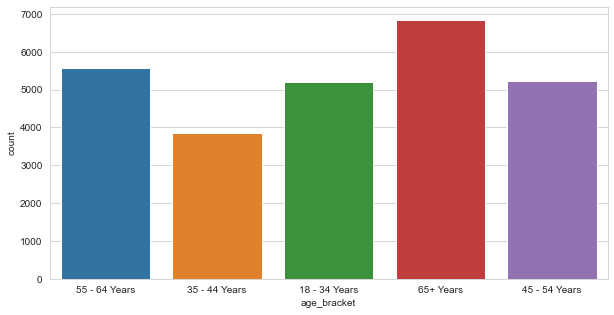

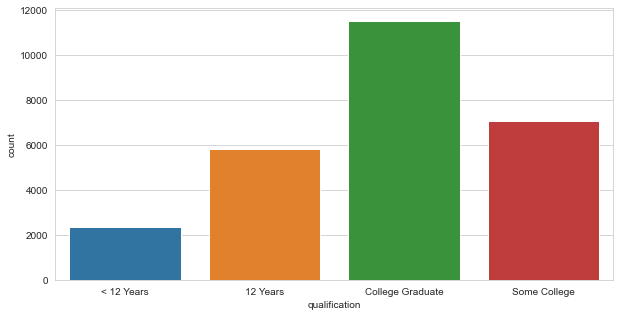

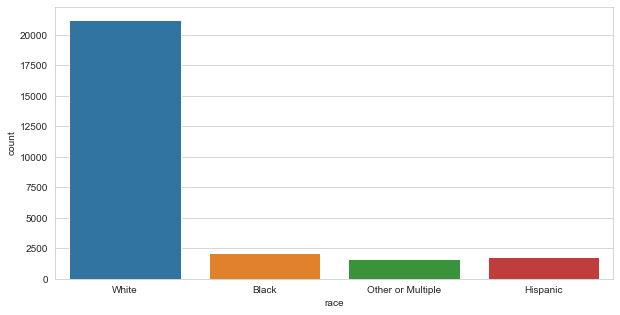

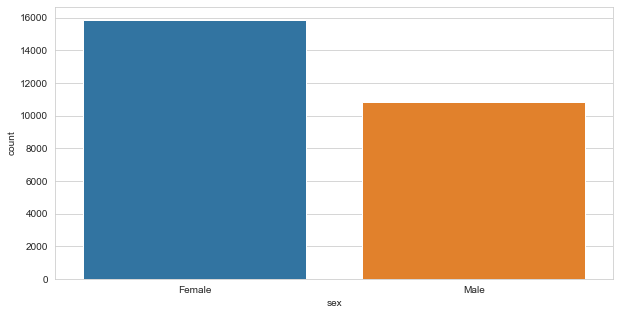

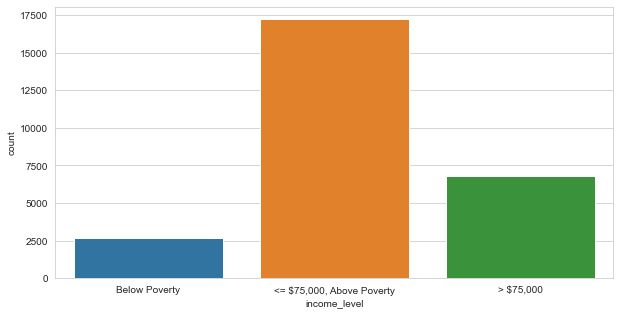

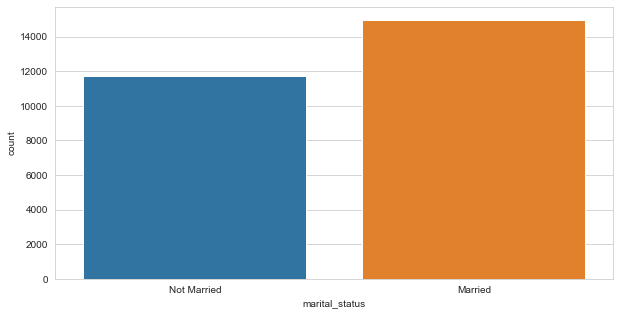

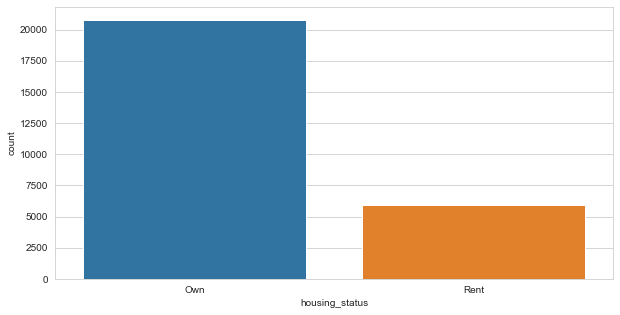

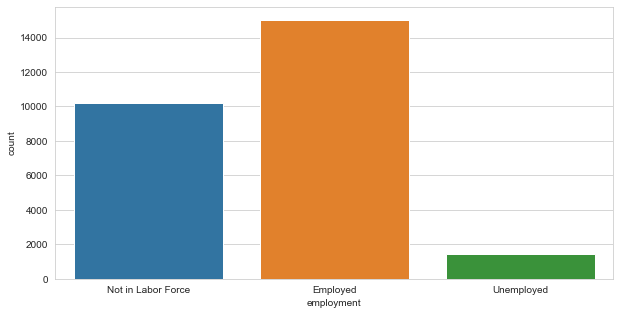

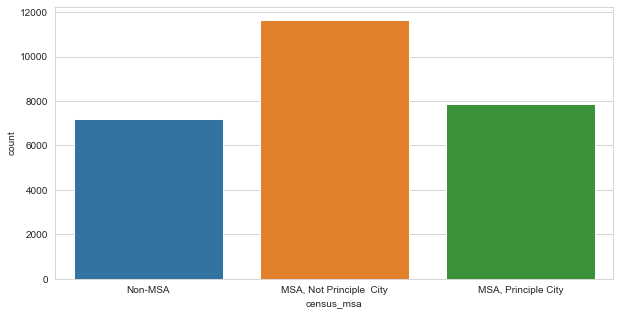

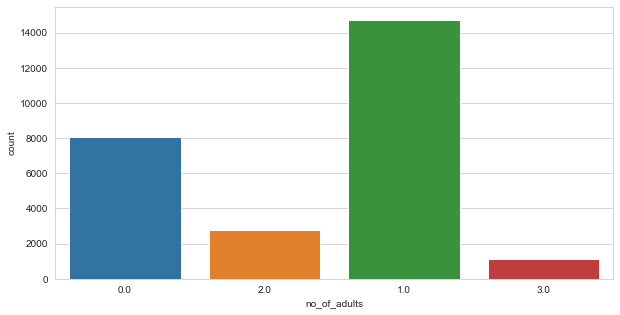

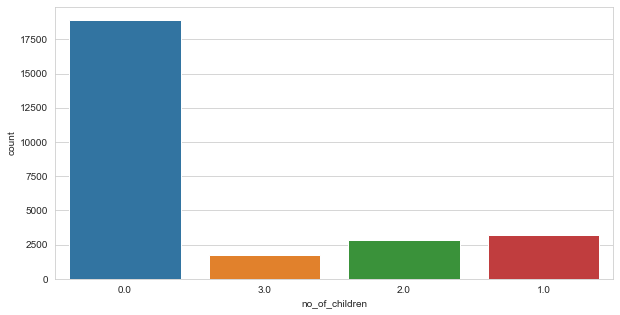

In [31]:
sns.set_style("whitegrid")
for i in predictor.columns:
    sns.countplot(x=predictor[i])
    plt.show()

C:\Users\spkpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\spkpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\spkpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\spkpr\anaconda3\lib\si

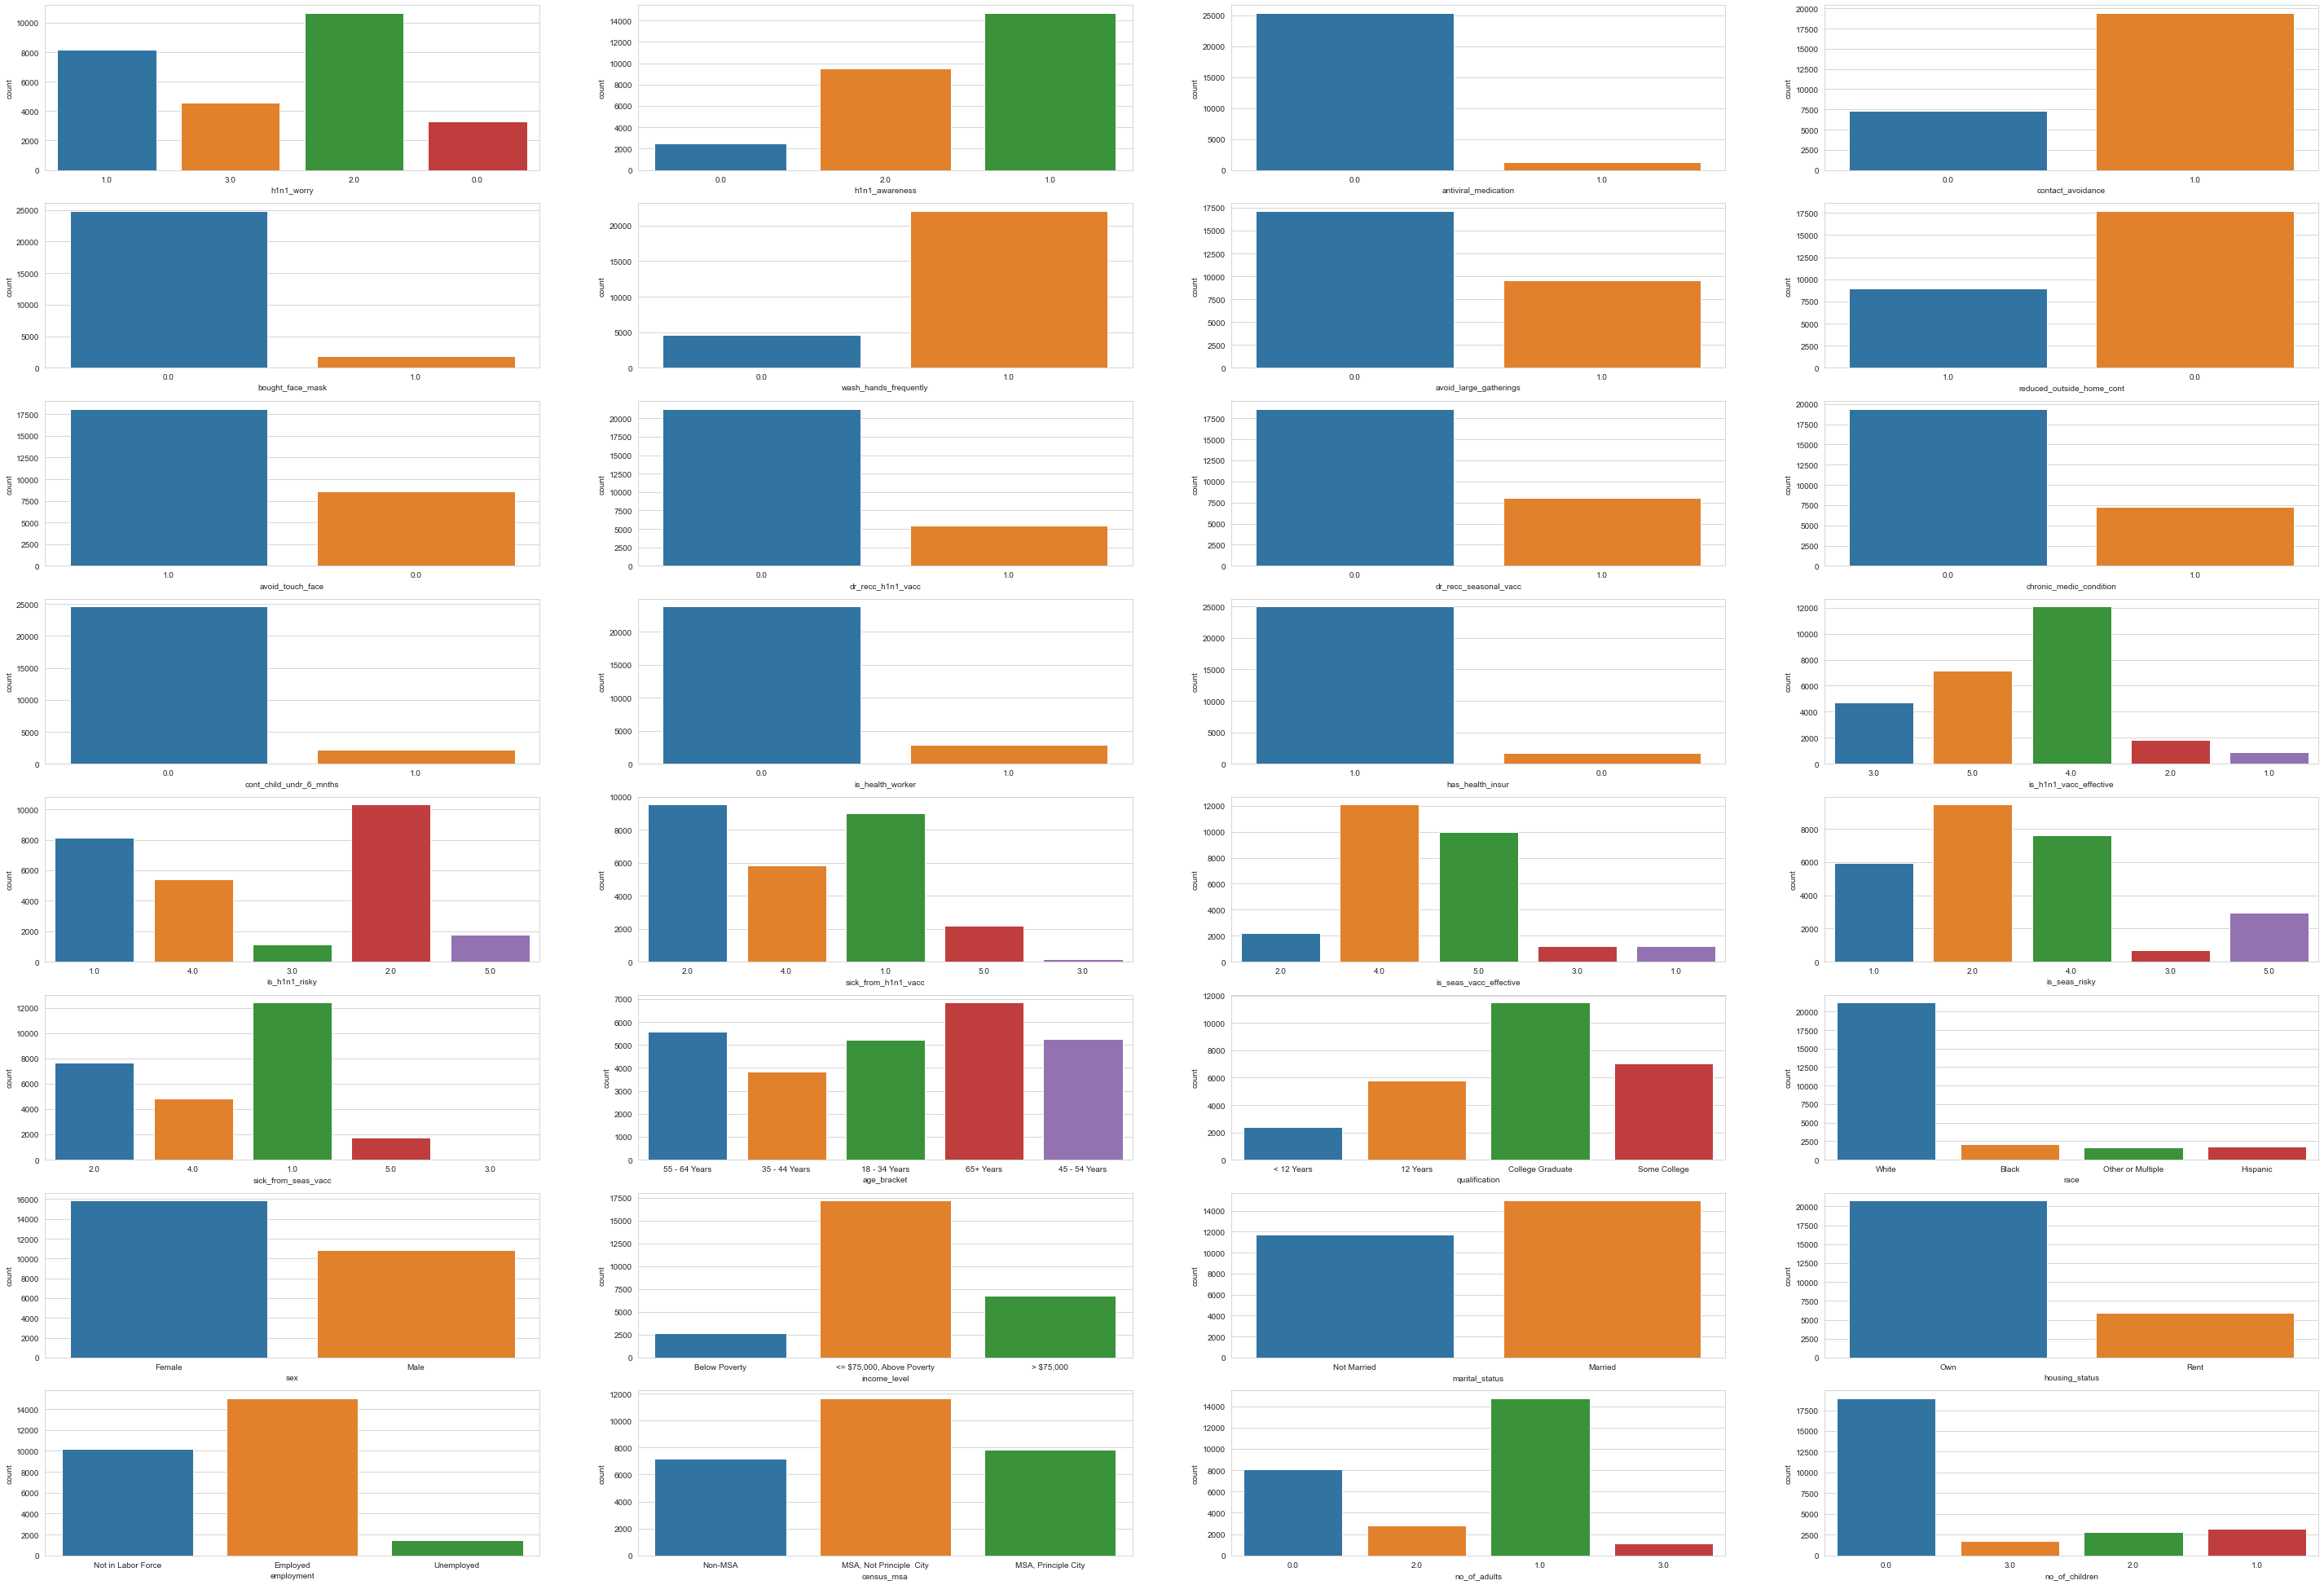

In [32]:
categorical = predictor.columns

fig, ax = plt.subplots(8, 4, figsize = (50, 35))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(predictor[variable], ax = subplot)
plt.show()

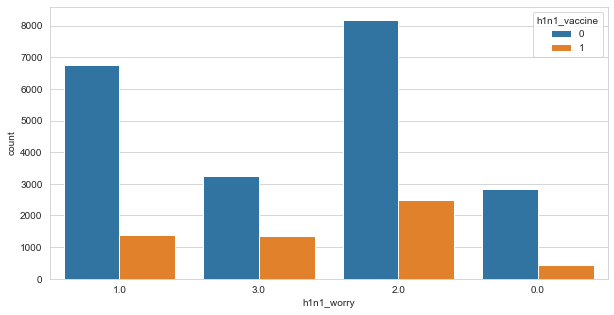

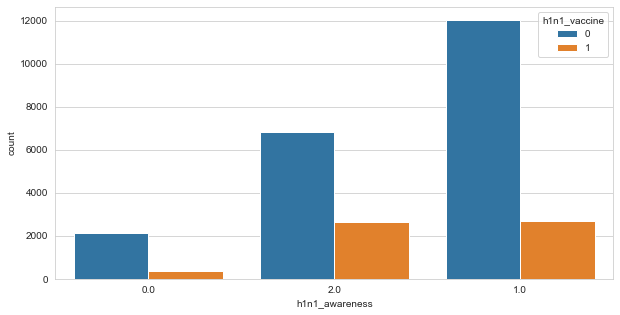

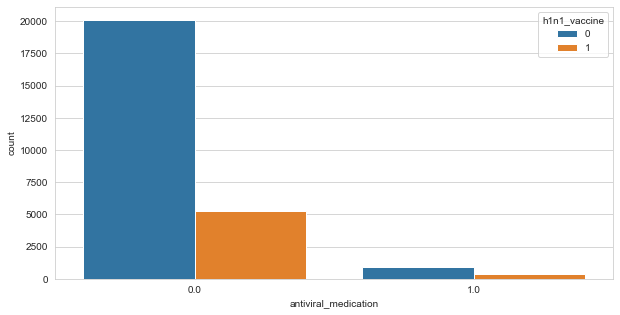

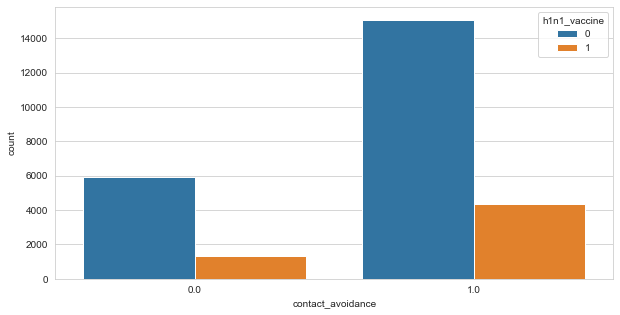

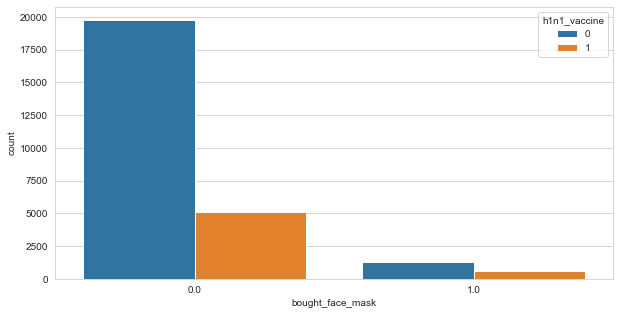

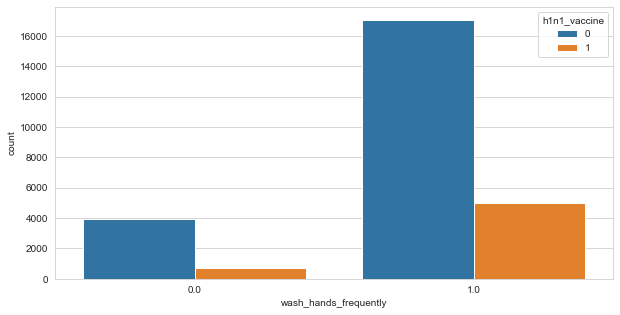

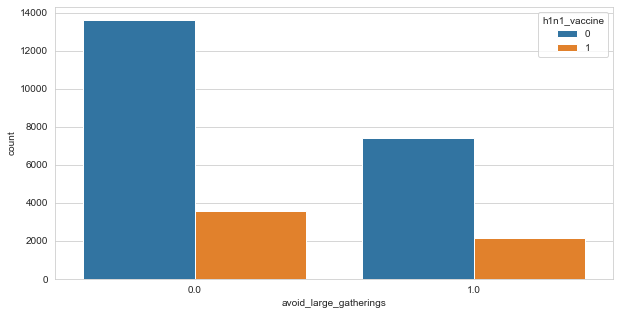

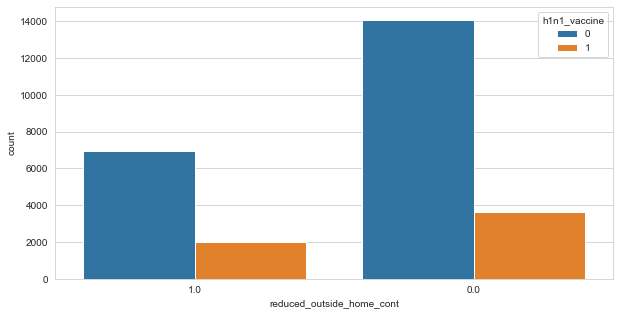

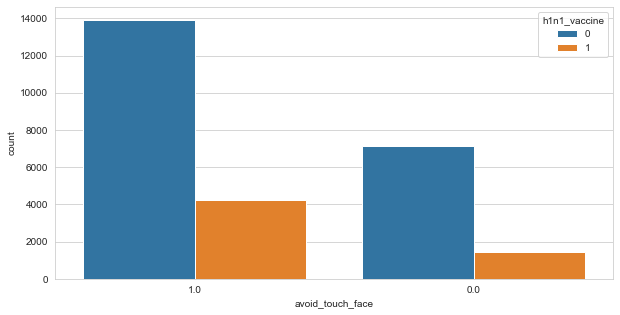

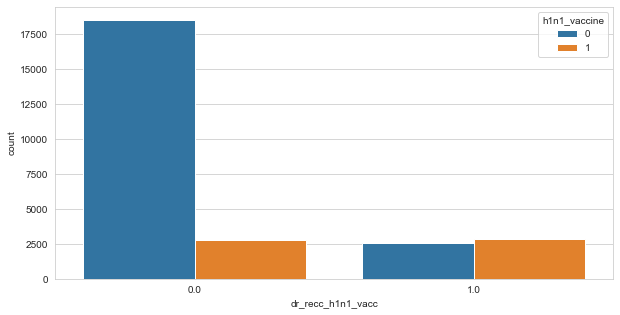

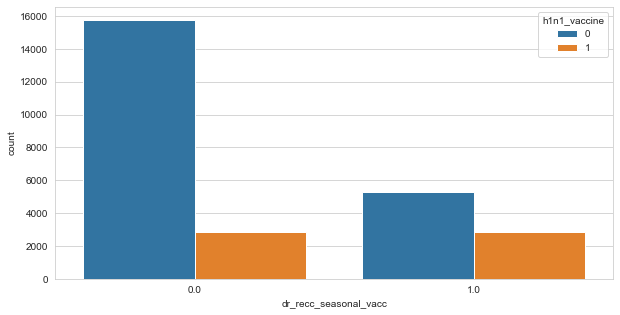

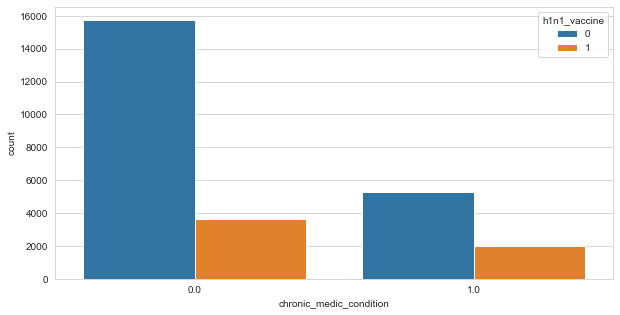

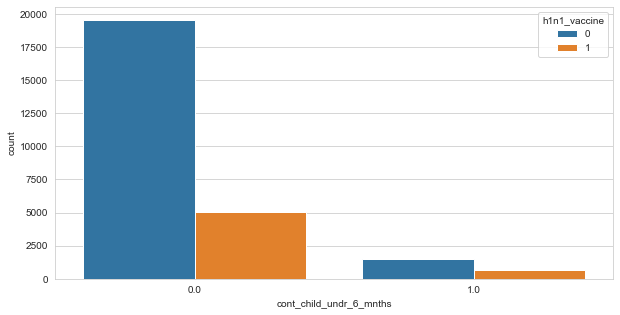

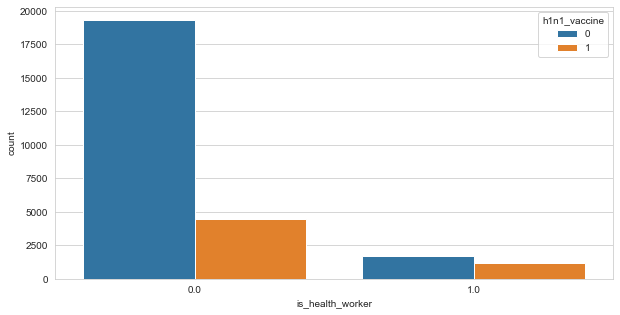

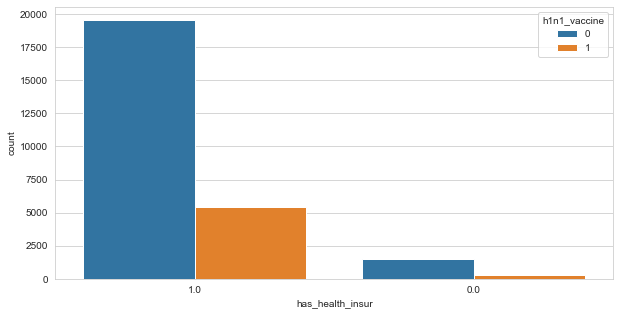

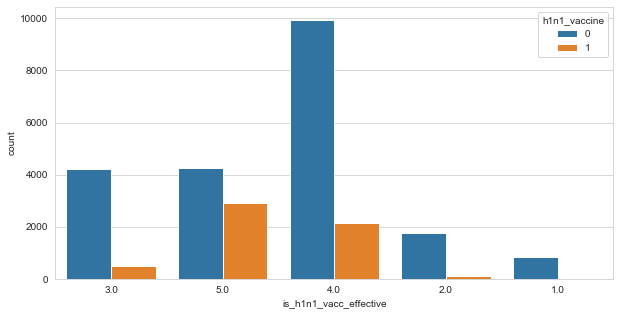

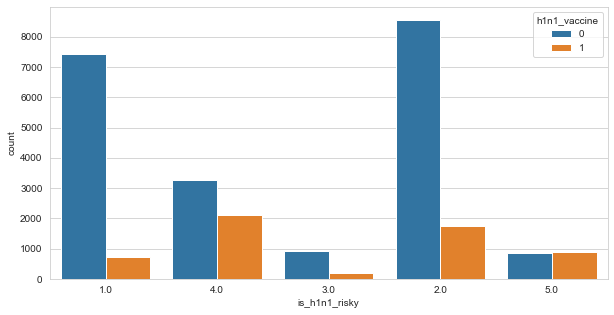

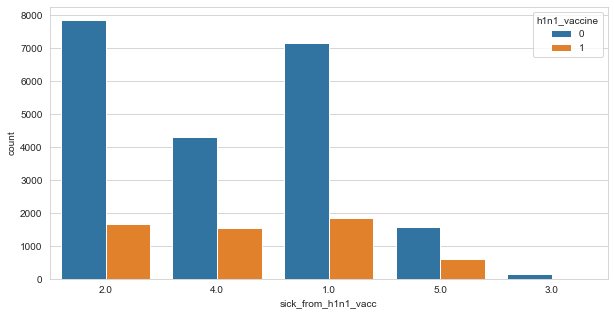

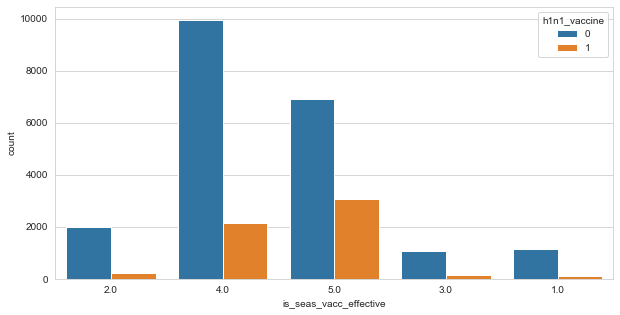

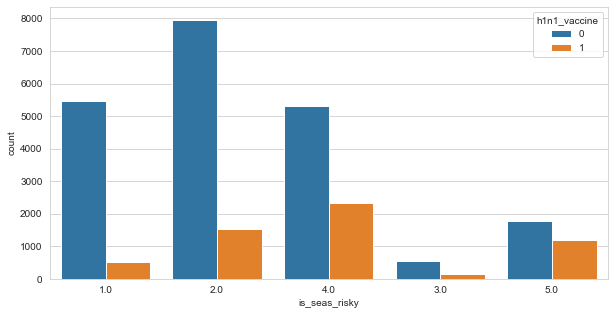

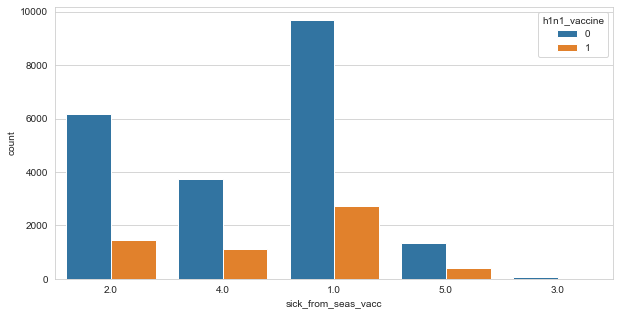

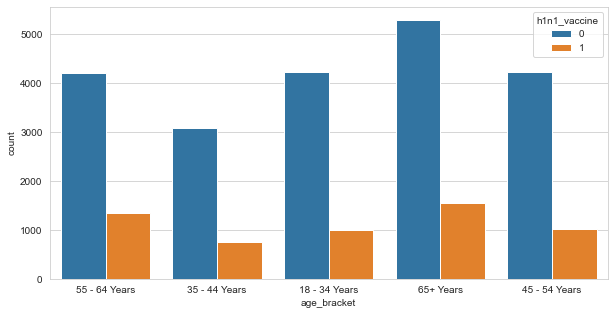

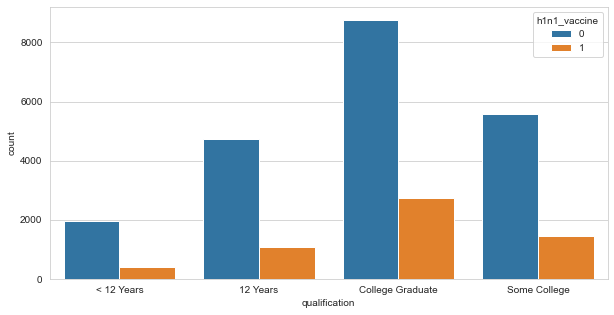

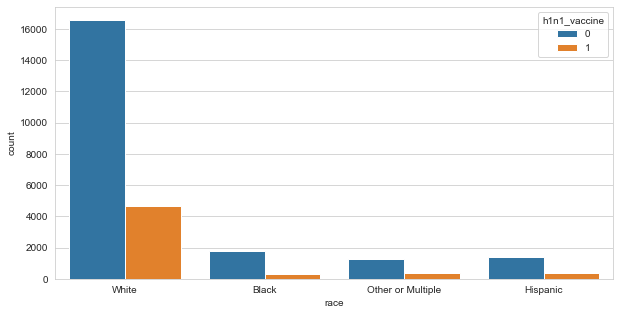

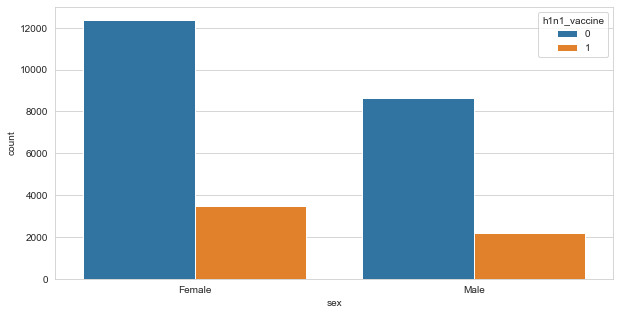

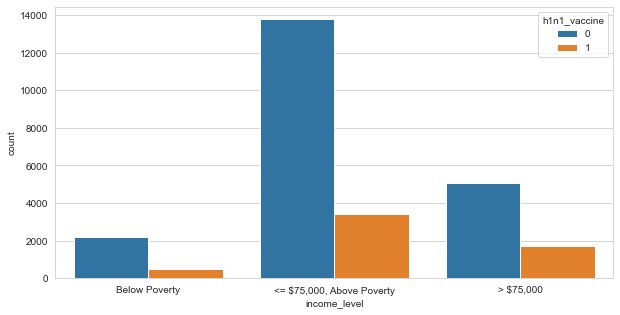

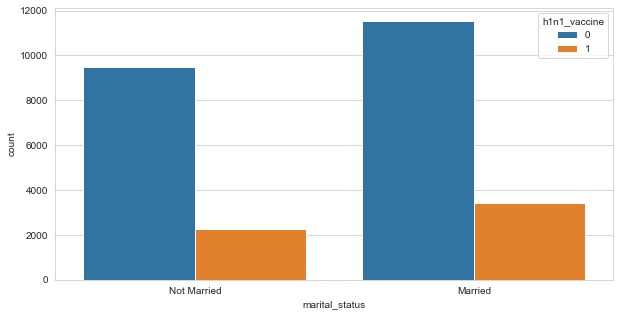

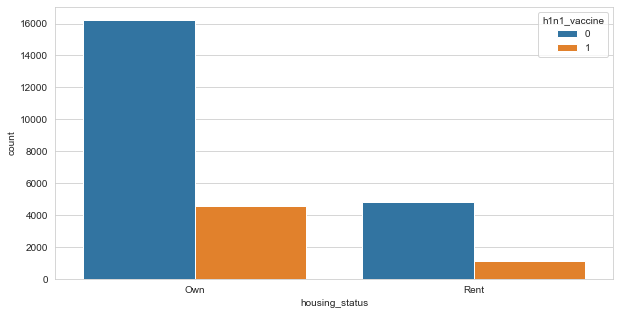

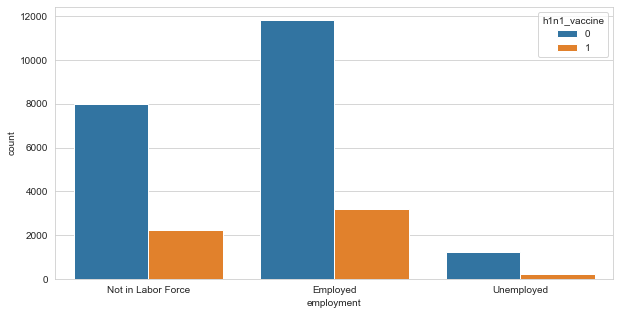

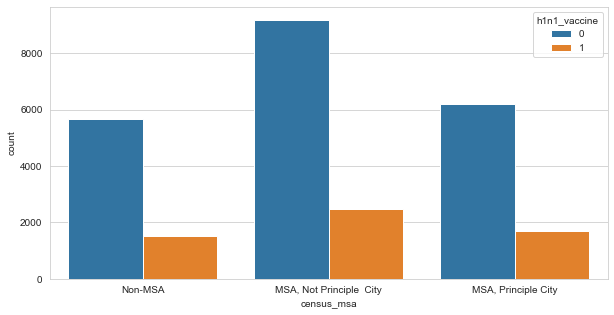

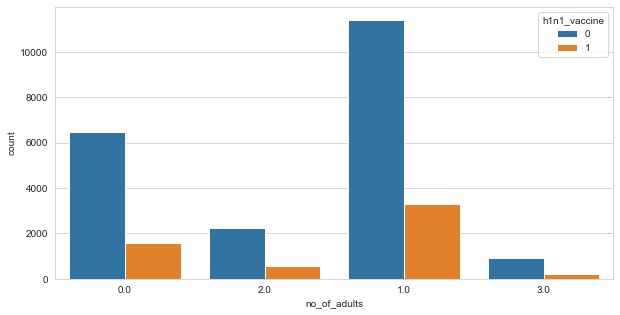

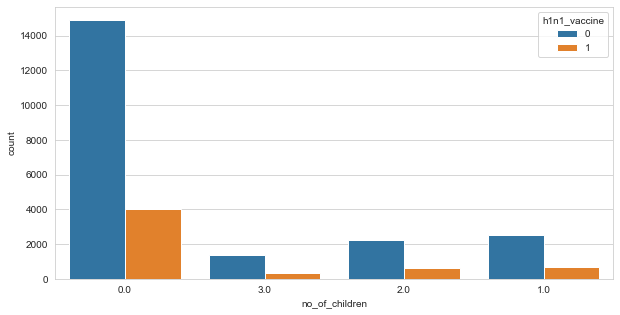

In [33]:
sns.set_style("whitegrid")
for i in predictor.columns:
    sns.countplot(x=predictor[i],hue=target)
    plt.show()

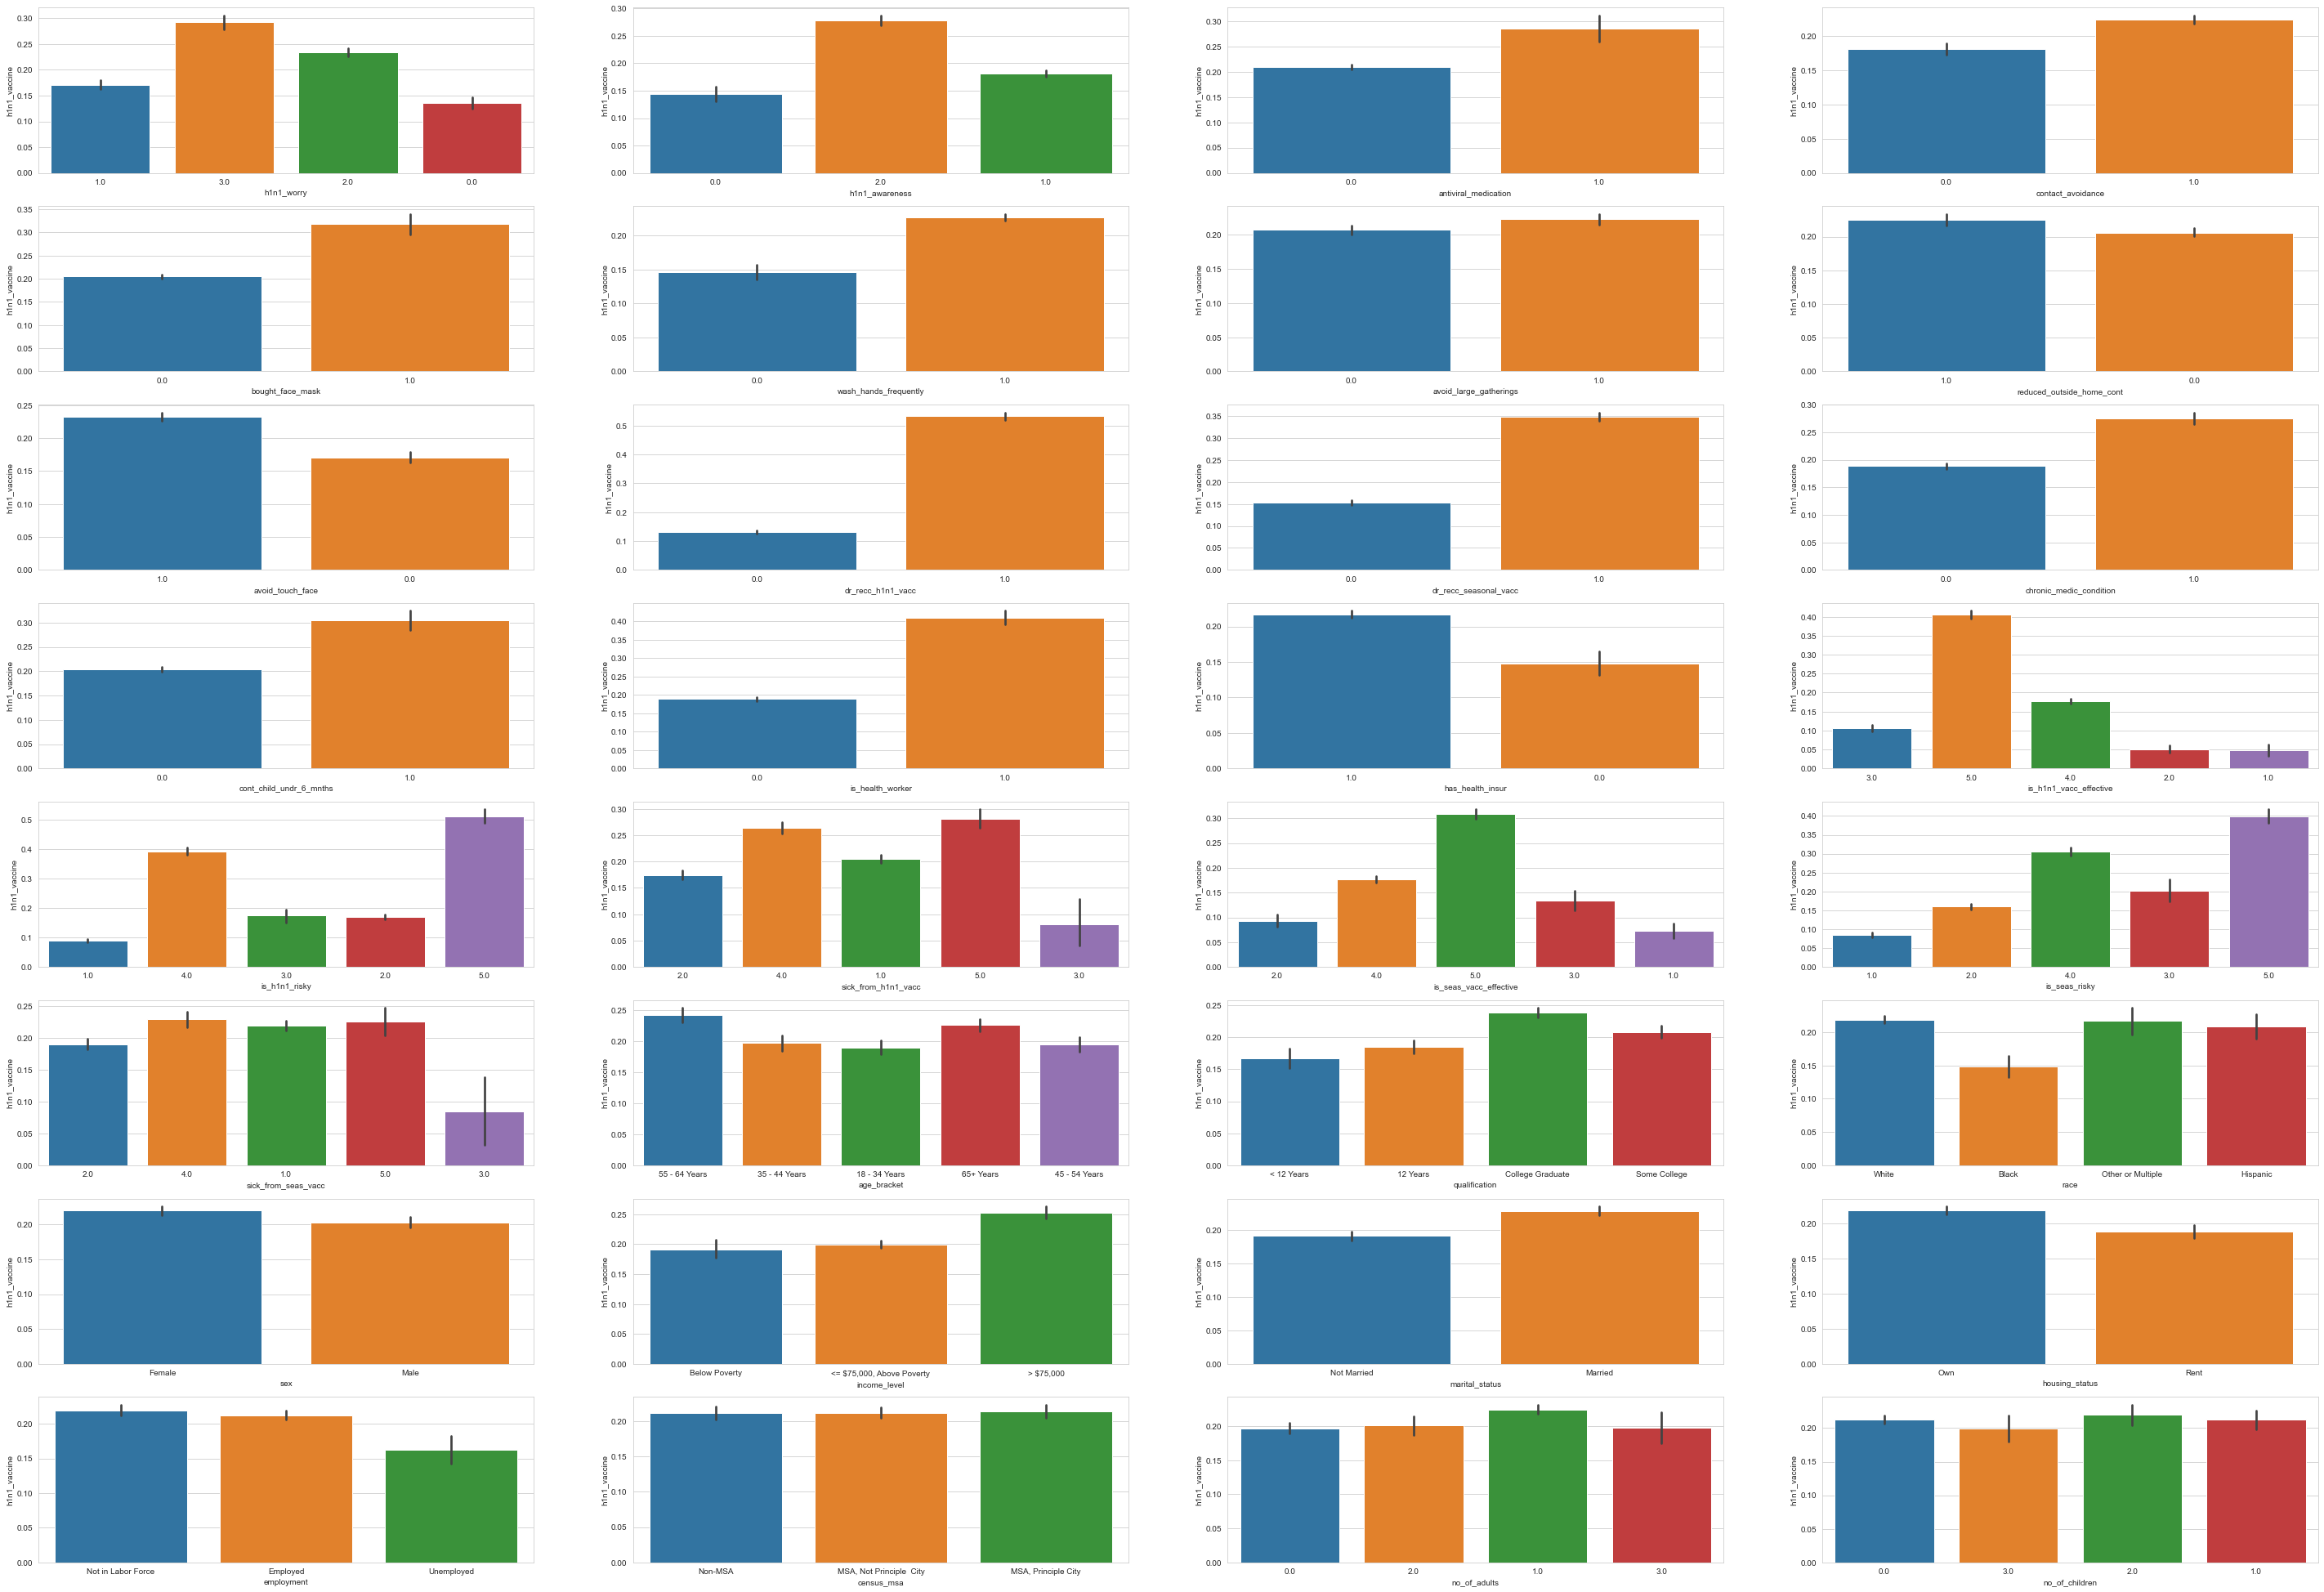

In [34]:
categorical = predictor.columns

fig, ax = plt.subplots(8, 4, figsize = (50, 35))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.barplot(x=predictor[variable],y=target, ax = subplot)
plt.show()

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [37]:
x=np.array(predict_dummy).reshape(-1,1)
y=np.array(target)

In [41]:
from imblearn.over_sampling import RandomOverSampler
rand=RandomOverSampler(random_state=0)
X_resampled,y_resampled=rand.fit_resample(np.array(predict_dummy),np.array(target))

In [42]:
len(X_resampled)

42066

In [43]:
len(y_resampled)

42066

In [44]:
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)


In [47]:
from sklearn.svm import SVC
log=SVC()
log.fit(x_train,y_train)

SVC()

In [48]:
y_pred=log.predict(x_test)

In [59]:
model=['model','accuracy_score','confusion_matrix','classification_report']
new_df=pd.DataFrame(columns=model)
model1=pd.Series({'model':'SVC','accuracy_score':accuracy_score(y_pred,y_test),
                 'confusion_matrix':confusion_matrix(y_pred,y_test),
                  'classification_report':classification_report(y_pred,y_test)})
new_df=new_df.append(model1,ignore_index=True)
new_df

,model,accuracy_score,confusion_matrix,classification_report
0,SVC,0.80996,"[[3451, 842], [757, 3364]]",precision recall f1-score ...


In [50]:
logi=LogisticRegression()
logi.fit(x_train,y_train)
y_pred2=logi.predict(x_test)
model2=pd.Series({'model:':'logistic','accuracy_score':accuracy_score(y_pred2,y_test),
                 'confusion_matrix':confusion_matrix(y_pred2,y_test),
                  'classification_report':classification_report(y_pred2,y_test)})
new_df=new_df.append(model2,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model:
0,0.809960,"[[3451, 842], [757, 3364]]",precision recall f1-score ...,SVC
1,0.761112,"[[3333, 1135], [875, 3071]]",precision recall f1-score ...,logistic


In [51]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred3=rfc.predict(x_test)
model3=pd.Series({'model:':'random f.c','accuracy_score':accuracy_score(y_pred3,y_test),
                 'confusion_matrix':confusion_matrix(y_pred3,y_test),
                  'classification_report':classification_report(y_pred3,y_test)})
new_df=new_df.append(model3,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model:
0,0.809960,"[[3451, 842], [757, 3364]]",precision recall f1-score ...,SVC
1,0.761112,"[[3333, 1135], [875, 3071]]",precision recall f1-score ...,logistic
2,0.939268,"[[3804, 107], [404, 4099]]",precision recall f1-score ...,random f.c


In [52]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred3=dtc.predict(x_test)
model3=pd.Series({'model:':'decision','accuracy_score':accuracy_score(y_pred3,y_test),
                 'confusion_matrix':confusion_matrix(y_pred3,y_test),
                  'classification_report':classification_report(y_pred3,y_test)})
new_df=new_df.append(model3,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model:
0,0.809960,"[[3451, 842], [757, 3364]]",precision recall f1-score ...,SVC
1,0.761112,"[[3333, 1135], [875, 3071]]",precision recall f1-score ...,logistic
2,0.939268,"[[3804, 107], [404, 4099]]",precision recall f1-score ...,random f.c
3,0.895650,"[[3455, 125], [753, 4081]]",precision recall f1-score ...,decision


In [53]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred3=abc.predict(x_test)
model3=pd.Series({'model:':'adaboost','accuracy_score':accuracy_score(y_pred3,y_test),
                 'confusion_matrix':confusion_matrix(y_pred3,y_test),
                  'classification_report':classification_report(y_pred3,y_test)})
new_df=new_df.append(model3,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model:
0,0.809960,"[[3451, 842], [757, 3364]]",precision recall f1-score ...,SVC
1,0.761112,"[[3333, 1135], [875, 3071]]",precision recall f1-score ...,logistic
2,0.939268,"[[3804, 107], [404, 4099]]",precision recall f1-score ...,random f.c
3,0.895650,"[[3455, 125], [753, 4081]]",precision recall f1-score ...,decision
4,0.757785,"[[3341, 1171], [867, 3035]]",precision recall f1-score ...,adaboost


In [54]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_pred3=etc.predict(x_test)
model3=pd.Series({'model:':'extra','accuracy_score':accuracy_score(y_pred3,y_test),
                 'confusion_matrix':confusion_matrix(y_pred3,y_test),
                  'classification_report':classification_report(y_pred3,y_test)})
new_df=new_df.append(model3,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model:
0,0.809960,"[[3451, 842], [757, 3364]]",precision recall f1-score ...,SVC
1,0.761112,"[[3333, 1135], [875, 3071]]",precision recall f1-score ...,logistic
2,0.939268,"[[3804, 107], [404, 4099]]",precision recall f1-score ...,random f.c
3,0.895650,"[[3455, 125], [753, 4081]]",precision recall f1-score ...,decision
4,0.757785,"[[3341, 1171], [867, 3035]]",precision recall f1-score ...,adaboost
5,0.951034,"[[3932, 136], [276, 4070]]",precision recall f1-score ...,extra


In [55]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred3=gbc.predict(x_test)
model3=pd.Series({'model:':'gbc','accuracy_score':accuracy_score(y_pred3,y_test),
                 'confusion_matrix':confusion_matrix(y_pred3,y_test),
                  'classification_report':classification_report(y_pred3,y_test)})
new_df=new_df.append(model3,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model:
0,0.809960,"[[3451, 842], [757, 3364]]",precision recall f1-score ...,SVC
1,0.761112,"[[3333, 1135], [875, 3071]]",precision recall f1-score ...,logistic
2,0.939268,"[[3804, 107], [404, 4099]]",precision recall f1-score ...,random f.c
3,0.895650,"[[3455, 125], [753, 4081]]",precision recall f1-score ...,decision
4,0.757785,"[[3341, 1171], [867, 3035]]",precision recall f1-score ...,adaboost
5,0.951034,"[[3932, 136], [276, 4070]]",precision recall f1-score ...,extra
6,0.762776,"[[3342, 1130], [866, 3076]]",precision recall f1-score ...,gbc


In [56]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred3=sgd.predict(x_test)
model3=pd.Series({'model:':'sgd','accuracy_score':accuracy_score(y_pred3,y_test),
                 'confusion_matrix':confusion_matrix(y_pred3,y_test),
                  'classification_report':classification_report(y_pred3,y_test)})
new_df=new_df.append(model3,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model:
0,0.809960,"[[3451, 842], [757, 3364]]",precision recall f1-score ...,SVC
1,0.761112,"[[3333, 1135], [875, 3071]]",precision recall f1-score ...,logistic
2,0.939268,"[[3804, 107], [404, 4099]]",precision recall f1-score ...,random f.c
3,0.895650,"[[3455, 125], [753, 4081]]",precision recall f1-score ...,decision
4,0.757785,"[[3341, 1171], [867, 3035]]",precision recall f1-score ...,adaboost
5,0.951034,"[[3932, 136], [276, 4070]]",precision recall f1-score ...,extra
6,0.762776,"[[3342, 1130], [866, 3076]]",precision recall f1-score ...,gbc
7,0.745187,"[[2836, 772], [1372, 3434]]",precision recall f1-score ...,sgd


In [57]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_pred3=etc.predict(x_test)
model3=pd.Series({'model:':'extra','accuracy_score':accuracy_score(y_pred3,y_test),
                 'confusion_matrix':confusion_matrix(y_pred3,y_test),
                  'classification_report':classification_report(y_pred3,y_test)})
new_df=new_df.append(model3,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model:
0,0.809960,"[[3451, 842], [757, 3364]]",precision recall f1-score ...,SVC
1,0.761112,"[[3333, 1135], [875, 3071]]",precision recall f1-score ...,logistic
2,0.939268,"[[3804, 107], [404, 4099]]",precision recall f1-score ...,random f.c
3,0.895650,"[[3455, 125], [753, 4081]]",precision recall f1-score ...,decision
4,0.757785,"[[3341, 1171], [867, 3035]]",precision recall f1-score ...,adaboost
5,0.951034,"[[3932, 136], [276, 4070]]",precision recall f1-score ...,extra
6,0.762776,"[[3342, 1130], [866, 3076]]",precision recall f1-score ...,gbc
7,0.745187,"[[2836, 772], [1372, 3434]]",precision recall f1-score ...,sgd
8,0.953886,"[[3951, 131], [257, 4075]]",precision recall f1-score ...,extra


In [58]:
print('accuracy_score:',accuracy_score(y_pred3,y_test),
                 'confusion_matrix',confusion_matrix(y_pred3,y_test),
                  'classification_report',classification_report(y_pred3,y_test))

accuracy_score: 0.9538863798431186 confusion_matrix [[3951  131]
 [ 257 4075]] classification_report               precision    recall  f1-score   support

           0       0.94      0.97      0.95      4082
           1       0.97      0.94      0.95      4332

    accuracy                           0.95      8414
   macro avg       0.95      0.95      0.95      8414
weighted avg       0.95      0.95      0.95      8414

